<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Longer_Term_Crypto_Degrees_of_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:31:04 Starting...
14:31:04 Installing yfinance into Google notebook...
14:31:06 Installing arch into Google notebook...
14:31:17 Initialized.


In [2]:
try:
    from google.colab import drive
    nprint("Mounting Google drive...")
    drive.mount("/content/drive")

except:
    raise

Mounted at /content/drive
14:31:40 Google Drive None.


In [3]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=data.columns.droplevel(1)
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
data.drop(data.index[-1],inplace=True) # remove the final row in case it is not complete
data.drop(data.index[data.index<(fd:='2024-07-31')],inplace=True) # remove data before 2024-07-31
data=data[data.columns[data.apply(lambda x:x.first_valid_index())<=fd]] # remove newly added tickers after 2024-07-31
display(data)

Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
UTC Date,,,,,,,,,,,,,,
2024-07-31,2.001567,-2.358840,-4.200110,-2.365537,-0.047707,-2.837462,-2.073961,-1.452662,-2.375695,-2.164731,-6.382353,-3.024153,-1.936113,-2.775783
2024-08-01,8.726297,0.036957,-0.288448,1.151609,1.518046,-2.302137,-0.996922,-0.871557,0.491381,-0.799247,-0.816839,0.230222,-1.248259,-0.608589
2024-08-02,-5.610969,-8.265604,-7.564218,-6.025579,-4.053610,-6.341034,-6.167053,-6.727354,-7.544241,-6.546150,-7.190371,-8.025336,-3.852546,-5.256278
2024-08-03,-4.481945,-3.931834,-4.592054,-1.198185,-13.779336,-3.094934,-2.771871,-2.837828,-1.918234,-0.578258,-2.866894,0.234600,-2.236539,-0.486530
2024-08-04,-7.831497,-6.321154,-8.886479,-4.229510,-7.939911,-4.046256,-3.804583,-7.507444,-6.932854,-3.440406,-6.289529,-7.255568,-5.467211,-3.531816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01,3.479341,5.573397,3.612475,1.052484,6.184690,2.793236,2.968570,0.630061,8.422774,1.796095,2.436140,2.800633,27.754370,6.054679
2025-01-02,4.398638,4.159149,2.618596,2.644769,0.859725,4.382889,4.382051,2.967538,1.790842,0.141990,5.633803,5.649753,1.866140,0.253651
2025-01-03,5.086852,6.796198,2.673211,1.264423,8.732216,12.049819,5.816812,4.457175,6.393871,7.229561,6.710383,5.781388,3.844680,5.062348


Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
Return (%),,,,,,,,,,,,,,
AAVE-USD,1.000000,0.622207,0.528235,0.454628,0.616320,0.333281,0.642718,0.657096,0.658835,0.405966,0.409358,0.687357,0.175036,0.382593
AVAX-USD,0.622207,1.000000,0.672149,0.677753,0.749017,0.614541,0.741809,0.707495,0.821590,0.617233,0.642320,0.638828,0.352231,0.519659
BCH-USD,0.528235,0.672149,1.000000,0.772028,0.549648,0.666972,0.791473,0.790852,0.608051,0.620516,0.655331,0.699511,0.369656,0.578023
BTC-USD,0.454628,0.677753,0.772028,1.000000,0.513206,0.757397,0.665972,0.802060,0.556674,0.546916,0.670882,0.609466,0.237277,0.454761
COMP-USD,0.616320,0.749017,0.549648,0.513206,1.000000,0.473948,0.732672,0.637596,0.675437,0.512054,0.579130,0.592918,0.322772,0.508460
DOGE-USD,0.333281,0.614541,0.666972,0.757397,0.473948,1.000000,0.579658,0.626460,0.448741,0.480777,0.784388,0.493891,0.305489,0.399006
ETC-USD,0.642718,0.741809,0.791473,0.665972,0.732672,0.579658,1.000000,0.823785,0.682450,0.686830,0.682433,0.775427,0.500651,0.593836
ETH-USD,0.657096,0.707495,0.790852,0.802060,0.637596,0.626460,0.823785,1.000000,0.654566,0.581147,0.637728,0.734303,0.265268,0.519292
LINK-USD,0.658835,0.821590,0.608051,0.556674,0.675437,0.448741,0.682450,0.654566,1.000000,0.606527,0.464113,0.667359,0.343229,0.534502


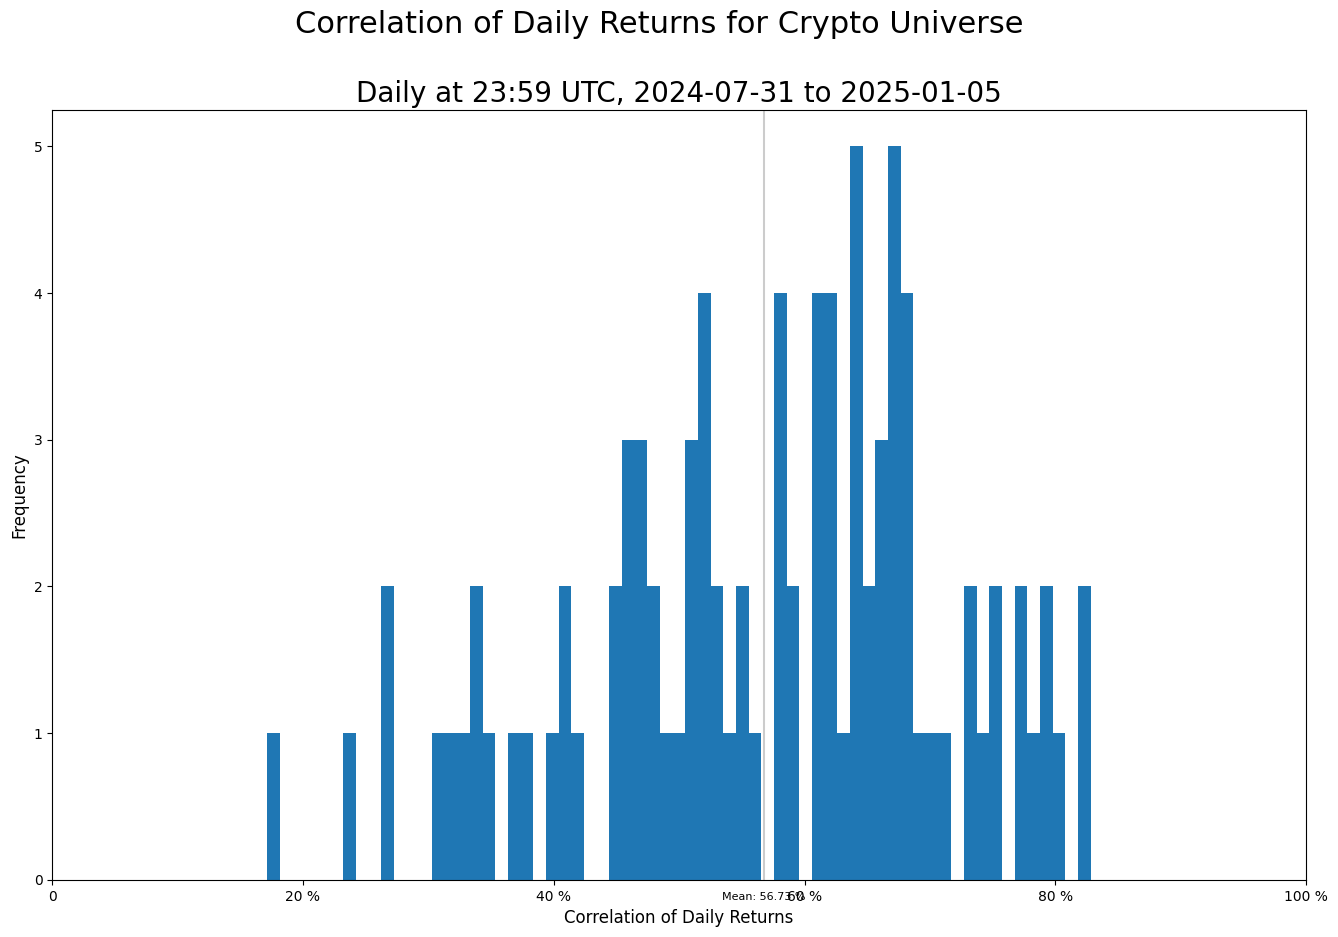

In [4]:
display(rho:=data.corr())
samples=pd.DataFrame({"row":[],"column":[],"correlation":[]}).set_index(["row","column"])

for i in range(rho.shape[0]):
    for j in range(i+1,rho.shape[0]):
        samples.loc[(rho.index[i],rho.columns[j]),"correlation"]=rho.iloc[i,j]*hundred

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(samples['correlation'],bins=np.linspace(zero,hundred,100))
plot.set_xlabel("Correlation of Daily Returns",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels(0))
plot.set_title(subtitle:="Daily at 23:59 UTC, %s to %s" % (data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,hundred)
plot.axvline(m:=samples['correlation'].mean(),color='black',alpha=0.2)
plot.text(m,zero,"\nMean: {:.2f} %".format(m),ha='center',va='top',fontsize=8)
figure.suptitle(title:="Correlation of Daily Returns for Crypto Universe",fontsize=22)
figure.savefig((filepath:='/content/drive/MyDrive/')+title+(filetype:='.pdf'),dpi=300,bbox_inches='tight')

In [5]:
if 'random_seed' not in locals():
    random_seed=12345678 # don't reset the seed multiple times in one session

if random_seed is not None:
    generator=np.random.default_rng(seed=random_seed)
    nprint("Using NumPy random seed %d." % random_seed)
    random_seed=None

else:
    nprint("Continuing random sequence from prior seed.")

14:31:45 Using NumPy random seed 12345678.


In [6]:
results=pd.DataFrame({"Sample":range(1,(n:=1000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^503-1 choices
    returns=pd.DataFrame()

    for ticker in data[generator.choice(data.columns,generator.integers(1,data.shape[1]+1),replace=False)]:
        returns[ticker]=data[ticker]
        returns=returns.copy() # 'cos it frags, apparently

    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],returns.columns))) # list of coins in portfolio
    returns['Portfolio']=returns.mean(axis=1) # equal weighted portfolio return
    select=returns["Portfolio"]>zero if filter=="Up" else returns["Portfolio"]<zero if filter=="Down" else ~returns["Portfolio"].isna()
    results.loc[i,"Assets"]=returns.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=returns.loc[select,[a for a in returns if a!="Portfolio"]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=returns.loc[select,'Portfolio'].var() # variance of portfolio returns for same period as individual returns

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

14:31:45 Beginning analysis for 1,000 trials.


  0%|          | 0/1000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Independent,Effective D.o.F.
Sample,,,,,
1,14.0,15.008130,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,S...",1.976041,1.843306
2,9.0,14.913921,"AAVE,AVAX,BTC,ETH,LINK,LTC,SHIB,UNI,XLM",3.118696,1.882018
3,8.0,16.384007,"COMP,DOGE,ETH,LTC,SHIB,UNI,XLM,XTZ",3.936200,1.921972
4,7.0,15.646568,"BCH,ETH,LINK,LTC,SHIB,UNI,XTZ",3.649961,1.632928
5,10.0,15.094002,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETH,SHIB,UNI,XLM",2.813498,1.863984
...,...,...,...,...,...
996,7.0,19.427186,"AAVE,AVAX,COMP,DOGE,LINK,SHIB,XTZ",4.545051,1.637672
997,12.0,14.733277,"AAVE,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,SHIB,U...",2.094645,1.706052
998,8.0,14.626214,"BCH,BTC,ETC,LTC,SHIB,UNI,XLM,XTZ",3.411502,1.865966


14:32:03 Done.


In [7]:
from statsmodels.api import OLS,add_constant
Nmin,Nmax=five,results["Assets"].max()-one
design=results[select:=(results["Assets"]>=Nmin)&(results["Assets"]<=Nmax)][[yn:="Effective D.o.F.",xn:="Assets"]].drop_duplicates()
model=OLS(design[yn],add_constant(design[xn])).fit()
nprint(model.summary())
nprint("Implied regression factor count: {:.2f} +/- {:.2g} for data in [{:,.0f},{:,.0f}].".format(Kreg:=one/model.params.iloc[1],model.bse.iloc[1]/model.params.iloc[1]**4,Nmin,Nmax))
final=results[results[xn]==results[xn].max()].drop_duplicates(xn)
Nstar,Nact=tuple(final.iloc[-1][[yn,xn]])
rho=(Nact-Nstar)/((Nact-one)*Nstar)
nprint("Effective D.o.F. Limit {:,.2f}, Implied Correlation {:.2f} %.".format(Nstar,rho*hundred))
Khat=Nact/Nstar
nprint("Implied limiting factor count: {:.0f}.".format(Khat))

14:32:05                             OLS Regression Results                            
Dep. Variable:       Effective D.o.F.   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     70.79
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           3.07e-16
Time:                        14:32:05   Log-Likelihood:                 313.24
No. Observations:                 585   AIC:                            -622.5
Df Residuals:                     583   BIC:                            -613.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5912      0.021     75.780

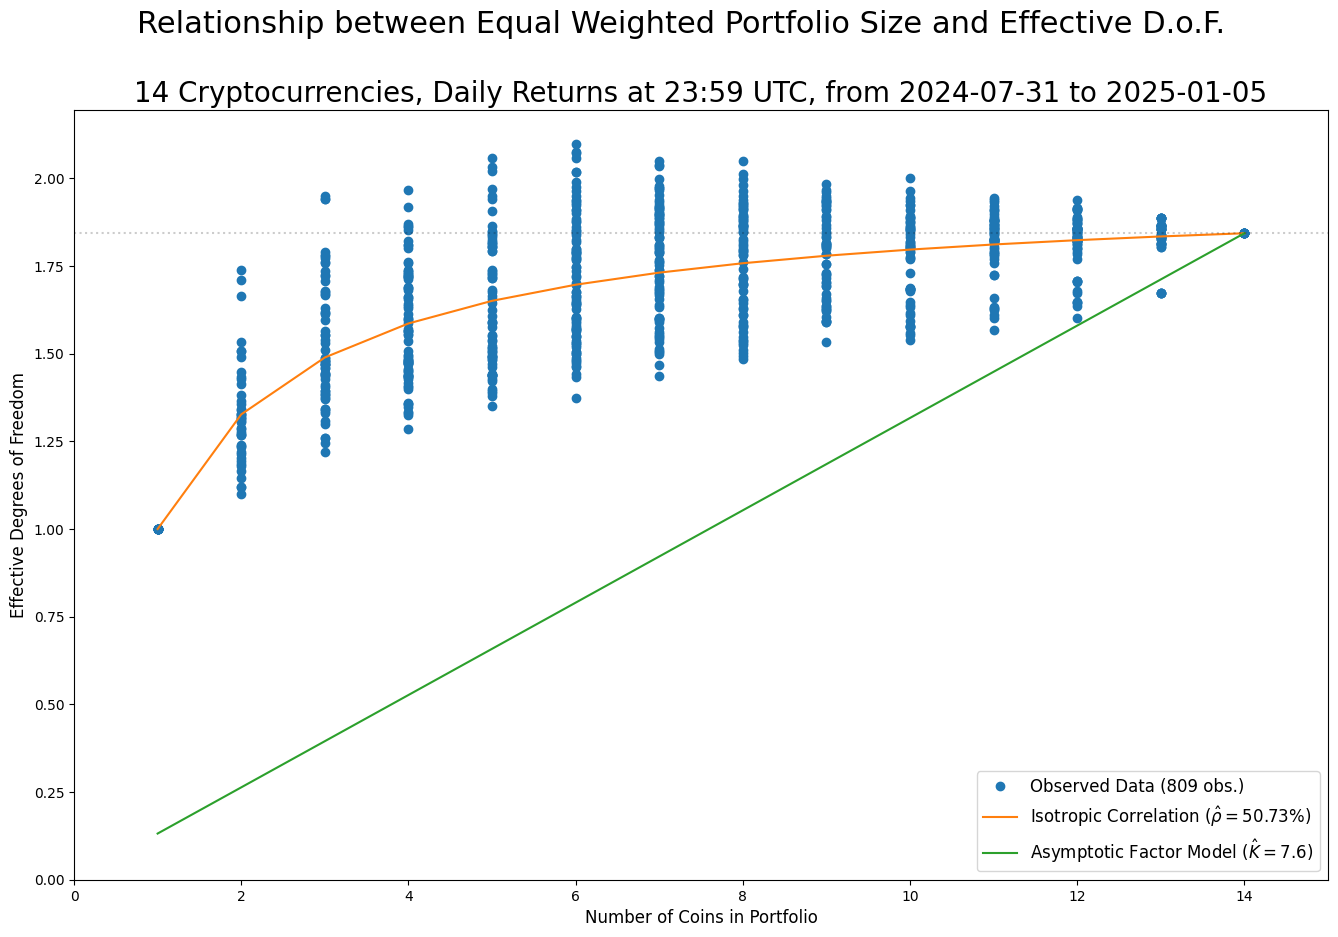

In [8]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results["Assets"].to_numpy(),y:=results["Effective D.o.F."].to_numpy(),'o',label='Observed Data (%d obs.)' % results.shape[0])
plot.plot(xp:=np.unique(np.sort(x)),xp/(one+(xp-one)*rho),'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred))
plot.plot(xp,xp/Khat,'-',label="Asymptotic Factor Model ($\\hat{K} = %.1f$)" % Khat)
#plot.plot(xpp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xpp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg)
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F.",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (data.shape[1],data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

14:32:07 Isotropic Model: Total Chi Squared 10.8682 for 12 d.o.f., p Value = 0.540246.
14:32:07 Factor Model: Total Chi Squared 16.9569 for 7 d.o.f., p Value = 0.0176761.


Mean   St.Dev. Sample  Std.Err. Isotropic                      \
                                                Model     Error   Z Score   
Assets                                                                      
1.0     1.000000  0.000000     14  0.000000  1.000000  0.000000       NaN   
2.0     1.327686  0.148367     44  0.022367  1.326866  0.000820  0.036663   
3.0     1.525848  0.177313     64  0.022164  1.489112  0.036736  1.657433   
4.0     1.579231  0.162429     80  0.018160  1.586084 -0.006853 -0.377388   
5.0     1.643862  0.185822     71  0.022053  1.650576 -0.006714 -0.304444   
6.0     1.713238  0.179001     89  0.018974  1.696565  0.016672  0.878696   
7.0     1.767029  0.156449     81  0.017383  1.731015  0.036013  2.071719   
8.0     1.765622  0.152436     69  0.018351  1.757786  0.007836  0.426998   
9.0     1.780285  0.124501     59  0.016209  1.779186  0.001099  0.067792   
10.0    1.773041  0.122859     58  0.016132  1.796686 -0.023645 -1.465700   
11.0    1.815891  0.090474     61  0.011584  1.811262  0.004629  0.399624   
12.0    1.818983  0.077322     66  0.009518  1.823590 -0.004607 -0.484039   
13.0    1.831532  0.056868     43  0.008672  1.834154 -0.002621 -0.302250   

                    Factor                                
         Chi Sq.     Model     Error   Z Score   Chi Sq.  
Assets                                                    
1.0          NaN       NaN       NaN       NaN       NaN  
2.0     0.001344       NaN       NaN       NaN       NaN  
3.0     2.747084       NaN       NaN       NaN       NaN  
4.0     0.142422       NaN       NaN       NaN       NaN  
5.0     0.092686  1.690491 -0.046629 -2.114411  4.470736  
6.0     0.772107  1.710357  0.002880  0.151801  0.023043  
7.0     4.292020  1.730224  0.036805  2.117275  4.482854  
8.0     0.182328  1.750090  0.015532  0.846358  0.716322  
9.0     0.004596  1.769956  0.010329  0.637243  0.406079  
10.0    2.148277  1.789823 -0.016782 -1.040269  1.082160  
11.0    0.159699  1.809689  0.006202  0.535380  0.286632  
12.0    0.234294  1.829555 -0.010572 -1.110800  1.233876  
13.0    0.091355  1.849422 -0.017889 -2.062818  4.255217

14:32:07 F Test for Equivalence of Descriptions: F(7,12) = 2.67468, p Value = 0.129061.


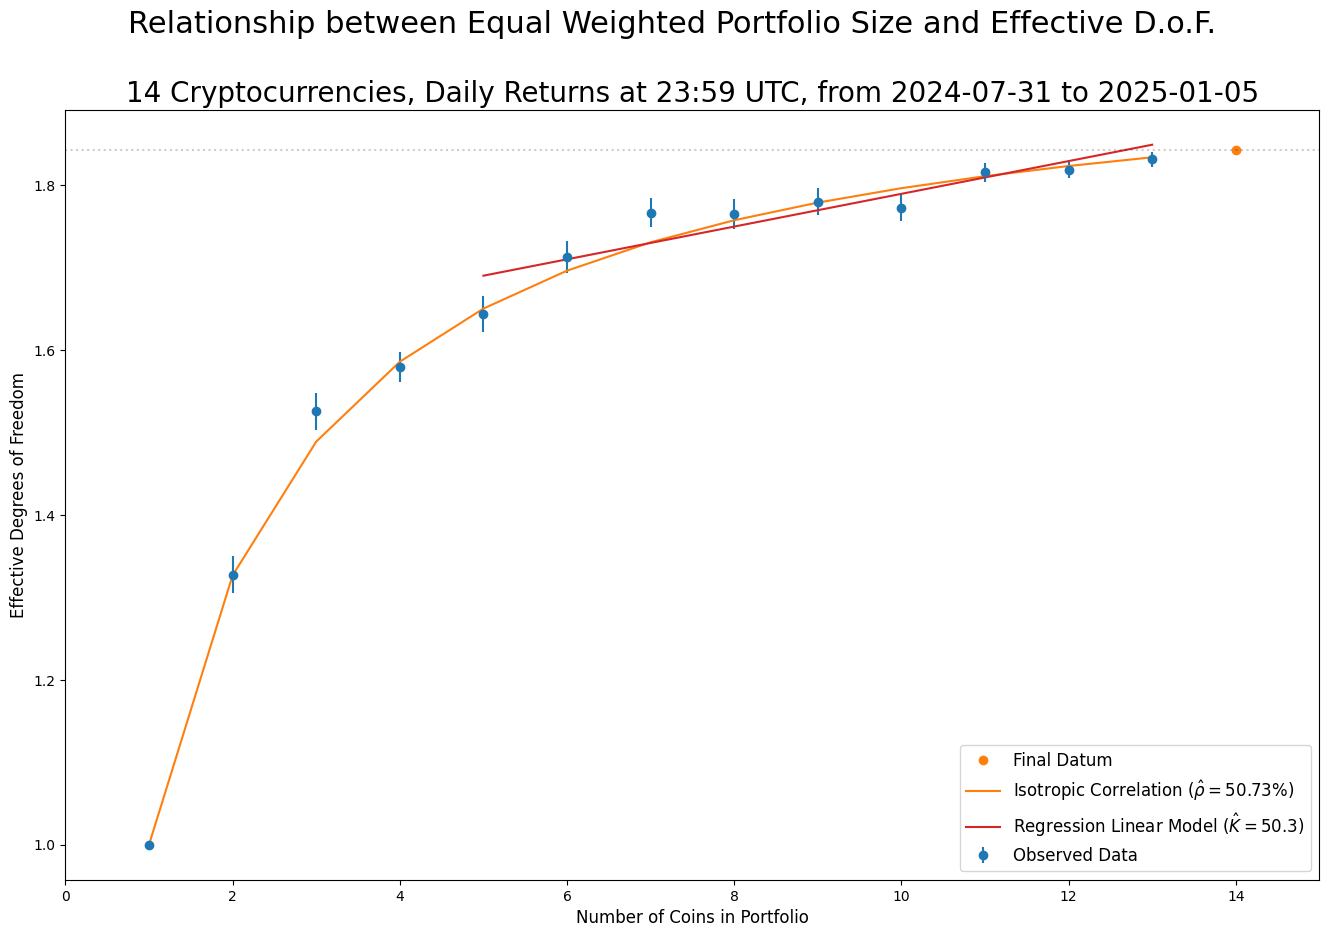

In [9]:
from scipy.stats import chi2,f as fdensity
meta=pd.DataFrame()
meta["Mean"]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta["St.Dev."]=g.std()
meta["Sample"]=g.count()
meta["Std.Err."]=meta["St.Dev."]/meta["Sample"]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))
meta[(l:="Factor","Model")]=list(map(lambda x:model.params.iloc[0]+model.params.iloc[1]*x if x>=Nmin and x<=Nmax else np.nan,meta.index))
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(model.params),chi2(df2).sf(sc22)))
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
display(meta)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta["Mean"],yerr=meta["Std.Err."],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg,color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 2"+filetype,dpi=300,bbox_inches='tight')

14:32:08 Isotropic Model: Total Chi Squared 10.8682 for 12 d.o.f., p Value = 0.540246.
14:32:08 Fitted linear factor model curve via NLLS: b2bar = 3.36177e-14 ± 0.200049, bbar2 = 7.69524 ± 3.1559e+07, s2bar = 17.5386 ± 7.19276e+07. K* = 4.36864e-15
14:32:08 Factor Model: Total Chi Squared 653.447 for 9 d.o.f., p Value = 6.99103e-135.


Sample                           Isotropic                      \
            Mean   St.Dev. Count  Std.Err.     Model     Error   Z Score   
Assets                                                                     
1.0     1.000000  0.000000    14  0.000000  1.000000  0.000000       NaN   
2.0     1.327686  0.148367    44  0.022367  1.326866  0.000820  0.036663   
3.0     1.525848  0.177313    64  0.022164  1.489112  0.036736  1.657433   
4.0     1.579231  0.162429    80  0.018160  1.586084 -0.006853 -0.377388   
5.0     1.643862  0.185822    71  0.022053  1.650576 -0.006714 -0.304444   
6.0     1.713238  0.179001    89  0.018974  1.696565  0.016672  0.878696   
7.0     1.767029  0.156449    81  0.017383  1.731015  0.036013  2.071719   
8.0     1.765622  0.152436    69  0.018351  1.757786  0.007836  0.426998   
9.0     1.780285  0.124501    59  0.016209  1.779186  0.001099  0.067792   
10.0    1.773041  0.122859    58  0.016132  1.796686 -0.023645 -1.465700   
11.0    1.815891  0.090474    61  0.011584  1.811262  0.004629  0.399624   
12.0    1.818983  0.077322    66  0.009518  1.823590 -0.004607 -0.484039   
13.0    1.831532  0.056868    43  0.008672  1.834154 -0.002621 -0.302250   

                    Factor                                   
         Chi Sq.     Model     Error    Z Score     Chi Sq.  
Assets                                                       
1.0          NaN  0.695043  0.304957        NaN         NaN  
2.0     0.001344  1.065234  0.262451  11.733743  137.680725  
3.0     2.747084  1.295179  0.230669  10.407276  108.311388  
4.0     0.142422  1.451883  0.127347   7.012477   49.174833  
5.0     0.092686  1.565532  0.078330   3.551896   12.615962  
6.0     0.772107  1.651726  0.061511   3.241855   10.509626  
7.0     4.292020  1.719343  0.047686   2.743226    7.525290  
8.0     0.182328  1.773803 -0.008181  -0.445815    0.198751  
9.0     0.004596  1.818606 -0.038321  -2.364231    5.589589  
10.0    2.148277  1.856112 -0.083071  -5.149422   26.516544  
11.0    0.159699  1.887969 -0.072079  -6.222230   38.716143  
12.0    0.234294  1.915364 -0.096381 -10.126533  102.546663  
13.0    0.091355  1.939174 -0.107641 -12.412131  154.061002

14:32:09 Wrote meta data to '/content/drive/MyDrive/meta.tex.'
14:32:09 F Test for Equivalence of Descriptions: F(9,12) = 80.1661, p Value = 4.93898e-09.


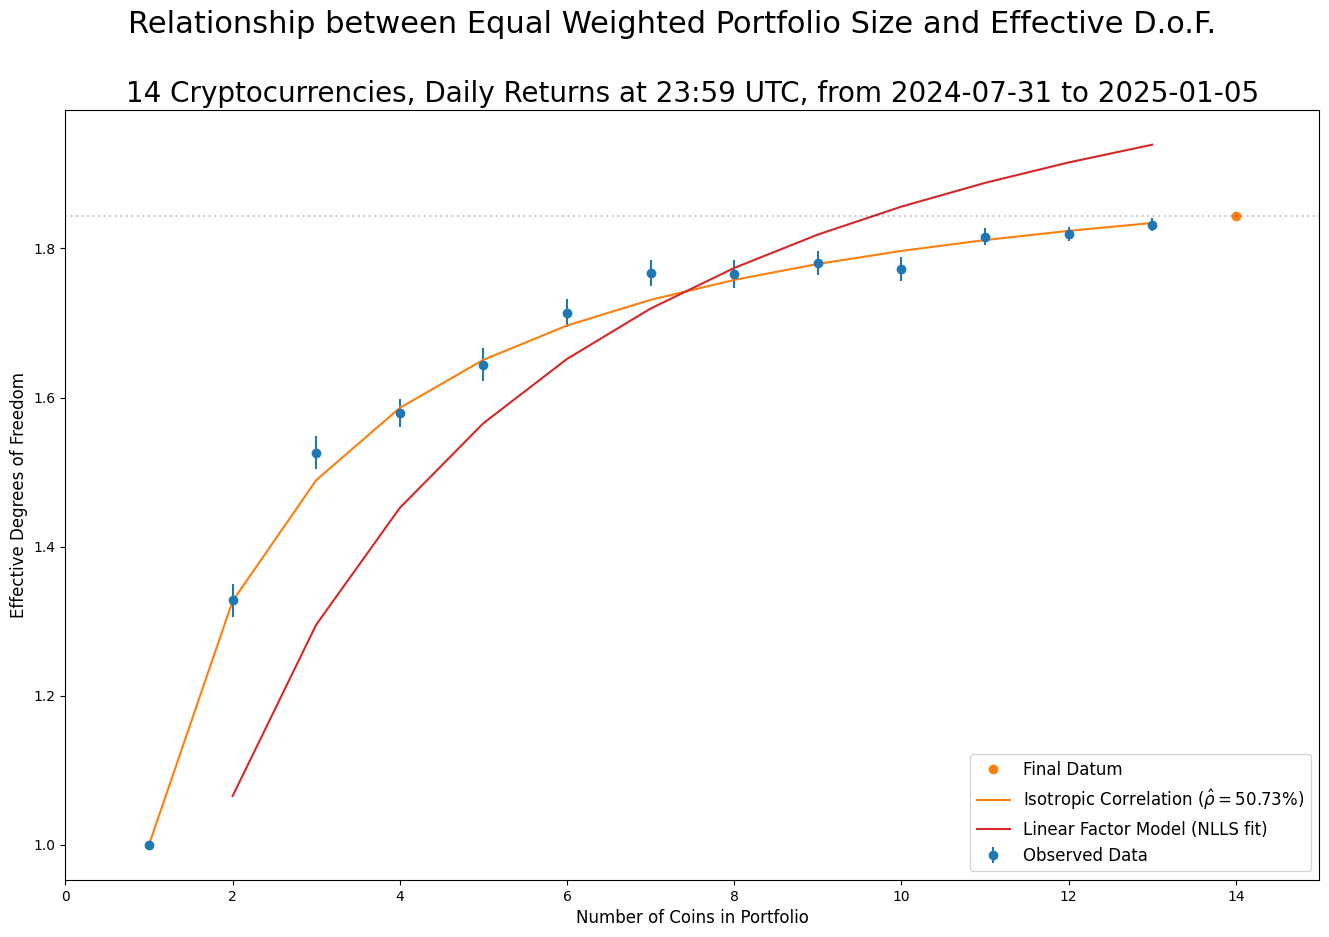

In [10]:
from scipy.stats import chi2,f as fdensity
from scipy.optimize import curve_fit

def nstar(N,*args):
    """Factor model N*(N) function. Parameters are: b2bar, bbar2, s2bar in that order."""
    b2bar,bbar2,s2bar=args
    return N*(b2bar*N+s2bar)/(bbar2*N+s2bar)

meta=pd.DataFrame()
meta[(s:="Sample","Mean")]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta[(s,"St.Dev.")]=g.std()
meta[(s,"Count")]=g.count()
meta[(s,"Std.Err.")]=meta[(s,"St.Dev.")]/meta[(s,"Count")]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta[(s,"Std.Err.")]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))

theta,vee=curve_fit(nstar,xf:=meta.index[1:],meta.loc[xf,(s,"Mean")],p0=(one,one,one/hundred),bounds=(zero,np.inf))
sigmas=np.sqrt(np.diag(vee))
nprint("Fitted linear factor model curve via NLLS: b2bar = %g ± %g, bbar2 = %g ± %g, s2bar = %g ± %g. K* = %g" % (theta[0],sigmas[0],theta[1],sigmas[1],theta[2],sigmas[2],theta[0]/theta[1]))
meta[(l:="Factor","Model")]=list(map(lambda q:nstar(q,*theta),meta.index))
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=(meta[(l,"Error")]/meta[(s,"Std.Err.")]).replace(np.inf,np.nan)
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(theta),chi2(df2).sf(sc22)))

display(meta)
meta.replace(np.nan,"").style.format(precision=3).to_latex(latexfile:=filepath+'meta.tex')
nprint("Wrote meta data to '%s.'" % latexfile)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta[(s,"Mean")],yerr=meta[(s,"Std.Err.")],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xf,zf:=list(map(lambda q:nstar(q,*theta),xf)),'-',label="Linear Factor Model (NLLS fit)",color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 3"+filetype,dpi=300,bbox_inches='tight')

In [11]:
from datetime import timedelta
history,returns=download(list(data)).xs('Adj Close',axis=1,level=0),pd.DataFrame()

for c in history:
    if history[c].last_valid_index()!=history.last_valid_index(): # get rid of tickers that have gone stale (this is COIN as returned by Yahoo)
        history.drop(columns=c,inplace=True)

    else:
        returns[c]=history[c].pct_change(fill_method=None)*hundred
        returns.loc[(f:=returns[c].first_valid_index()):(f+timedelta(days=365)),c]=np.nan # set first year of data to NA to avoid launch spikes

returns.index=pd.DatetimeIndex(returns.index).to_period('D')
returns.dropna(inplace=True,how='all')
returns.drop(returns.index[-1],inplace=True) # remove the final row in case it is not complete
returns=returns[[c for c in returns if c not in (vetoes:=['SHIB-USD','PEPE-USD','UNI-USD'])]].copy() # dropping SHIB,PEPE (very low values, precision issue) and UNI (step change in 2022 by orders of magnitude)
nprint("Removed %s entirely!" % ", ".join(vetoes))
returns=returns.copy()
returns['Count']=returns.count(axis=1)
returns=returns[returns['Count']>=five]
returns["Portfolio"]=returns.mean(axis=1)
returns["Year"]=returns.index.year
display(returns)

[*********************100%***********************]  14 of 14 completed

14:32:12 Removed SHIB-USD, PEPE-USD, UNI-USD entirely!


,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Count,Portfolio,Year
Date,,,,,,,,,,,,,,
2018-11-11,NaN,NaN,-4.161377,0.031982,-3.744292,-2.096713,-0.561329,-2.208038,-1.978748,4.737204,0.642718,9,-0.033859,2018
2018-11-12,NaN,NaN,-3.193828,-0.623901,-3.099306,-0.742514,-0.436262,10.431562,-1.395306,-2.294911,-3.804309,9,0.384122,2018
2018-11-13,NaN,NaN,-0.754790,-0.184889,-3.883811,-1.225531,-1.707076,3.312554,-1.878841,-3.568305,-1.776871,9,-0.266756,2018
2018-11-14,NaN,NaN,-14.266303,-9.767137,-8.488966,-12.485053,-12.294876,-5.778568,-12.245908,-9.598618,-10.177453,9,-8.610288,2018
2018-11-15,NaN,NaN,-4.094623,-1.573977,3.896099,-2.833865,-0.325807,-1.133531,0.773886,3.819467,-0.530559,9,0.699709,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01,3.468304,5.610697,3.582578,1.060220,2.732189,2.972499,0.629324,8.366824,1.691667,27.774616,6.174440,11,6.255280,2025
2025-01-02,4.297026,4.074239,2.672455,2.612925,4.410644,4.346048,2.918989,1.686715,0.264982,2.154440,0.228594,11,3.388921,2025
2025-01-03,5.133258,6.764333,2.535836,1.259773,12.010571,5.767752,4.450876,6.161029,7.229461,3.586920,4.997332,11,5.908095,2025


In [12]:
results=pd.DataFrame({"Sample":range(1,(n:=5000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n,"Period":[np.nan]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^Nmax-1 choices
    period=generator.choice(returns[p:="Year"].unique(),1)[0]
    subset=returns[returns[p]==period][generator.choice(a:=[c for c in returns.columns if '-' in c],generator.integers(1,len(a)+1),replace=False)].copy()
    subset.dropna(inplace=True)
    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],subset.columns))) # list of coins in portfolio
    subset['Portfolio']=subset.mean(axis=1) # equal weighted portfolio return
    results.loc[i,"Assets"]=subset.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=subset[[c for c in subset if '-' in c]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=subset['Portfolio'].var() # variance of portfolio returns for same period as individual returns
    results.loc[i,"Period"]=period

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

14:32:12 Beginning analysis for 5,000 trials.


  0%|          | 0/5000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Period,Independent,Effective D.o.F.
Sample,,,,,,
4,5.0,20.077800,"AVAX,BTC,ETC,ETH,LINK",2022.0,5.095088,1.268836
6,8.0,12.996425,"AAVE,AVAX,BTC,DOGE,ETC,ETH,XLM,XTZ",2024.0,2.722652,1.675939
7,11.0,13.966500,"AAVE,AVAX,BCH,BTC,DOGE,ETC,ETH,LINK,LTC,XLM,XTZ",2021.0,2.154150,1.696606
8,7.0,3.788435,"AVAX,BCH,BTC,ETC,ETH,LINK,LTC",2025.0,0.973392,1.798564
10,4.0,16.341560,"AAVE,BCH,DOGE,XLM",2024.0,7.126350,1.744350
...,...,...,...,...,...,...
4994,5.0,8.868237,"AVAX,BCH,LTC,XLM,XTZ",2023.0,3.133834,1.766887
4995,2.0,29.873839,"AVAX,ETC",2022.0,17.342882,1.161075
4996,6.0,7.816453,"AAVE,BCH,BTC,LINK,LTC,XLM",2023.0,2.306045,1.770147


14:32:40 Done.


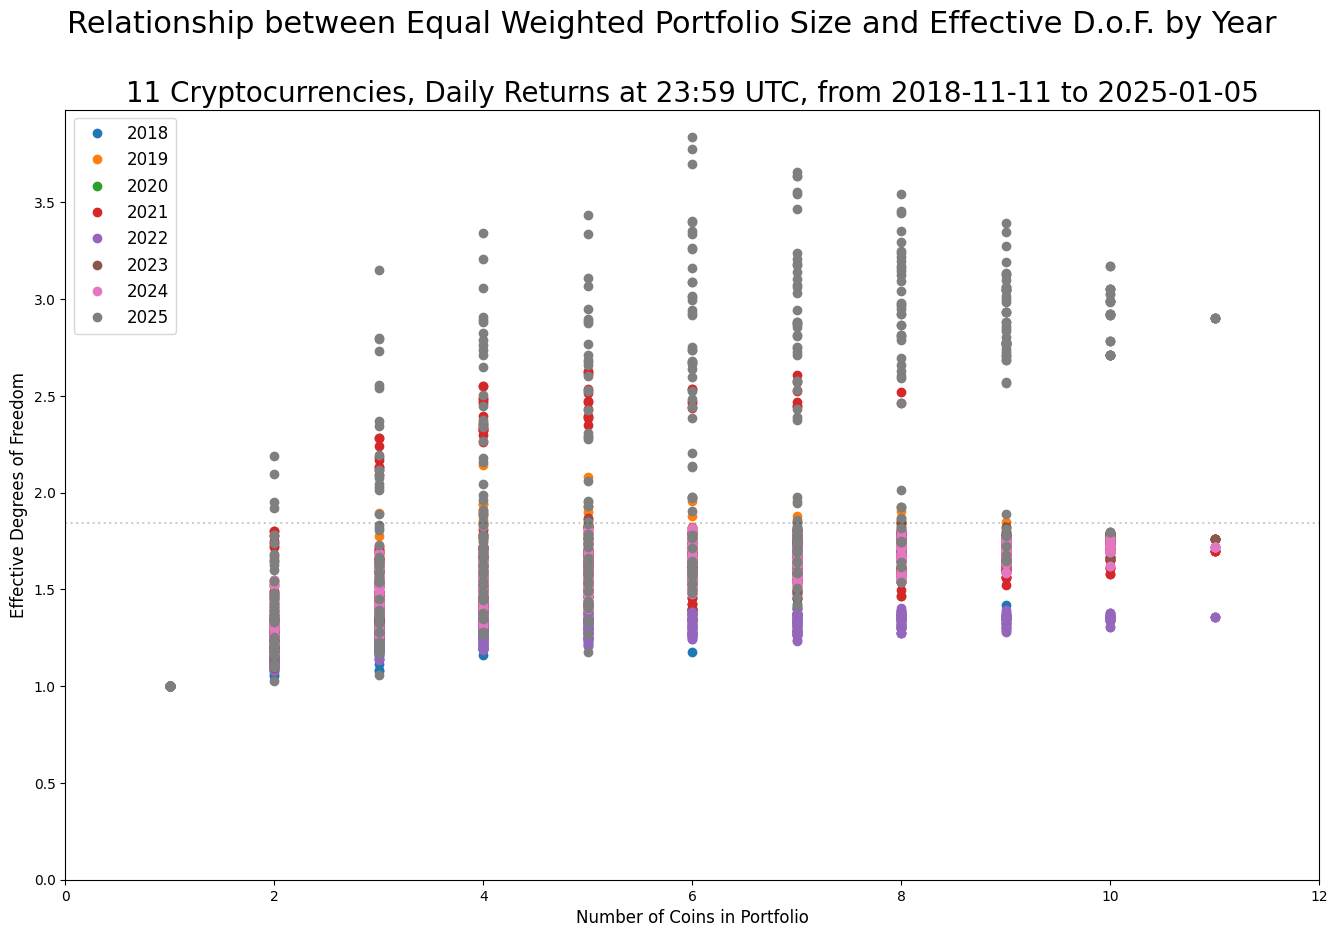

In [13]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
Nmax=results["Assets"].max()-one

for period in sorted(results["Period"].unique()):
    plot.plot(x:=results[select:=results["Period"]==period]["Assets"].to_numpy(),y:=results[select]["Effective D.o.F."].to_numpy(),'o',label=int(period))

plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F. by Year",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (len(a),returns.index[0],returns.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Portfolio,Assets,Independent,Effective D.o.F.,Imputed Correlation
Year,,,,,,,,,,,,,,,,
2018,NaN,NaN,138.100860,25.599532,22.740650,50.768403,48.368609,69.624589,39.790087,41.815496,50.243165,30.908678,9,6.012980,1.750862,51.754075
2019,NaN,NaN,28.684996,12.690500,11.798156,19.125543,16.915673,48.141735,23.726669,18.438624,33.475413,10.387239,9,2.629596,2.278408,36.876586
2020,NaN,NaN,29.951167,14.219099,28.864247,27.412591,24.391541,44.235523,26.028220,37.074306,35.577777,16.649036,9,3.305611,1.786920,50.457486
2021,26.338886,64.152351,48.766624,17.715785,486.126192,65.957318,31.357507,53.562107,37.260494,54.787837,60.438949,31.808283,11,7.822017,2.705025,30.665066
2022,40.176555,32.575116,19.110765,11.061469,31.665288,36.796413,20.448674,26.495531,20.252314,16.127458,23.118447,15.636538,11,2.296099,1.615261,58.100438
2023,14.929209,19.360389,17.632938,5.247752,10.643087,11.242495,5.976481,14.988606,11.610572,18.608535,11.133410,6.137769,11,1.168376,2.093942,42.532485
2024,27.377064,24.396001,27.763433,7.856515,29.002709,18.385281,11.606438,22.636858,15.641404,29.878391,25.747313,10.667420,11,1.985879,2.047794,43.716352
2025,10.651293,5.982942,4.209923,1.067317,29.040654,8.281627,3.934209,13.078090,11.142089,147.974422,9.663827,6.448291,11,2.025012,3.454423,21.843233


14:33:25 Wrote variances to '/content/drive/MyDrive/variances.tex.'


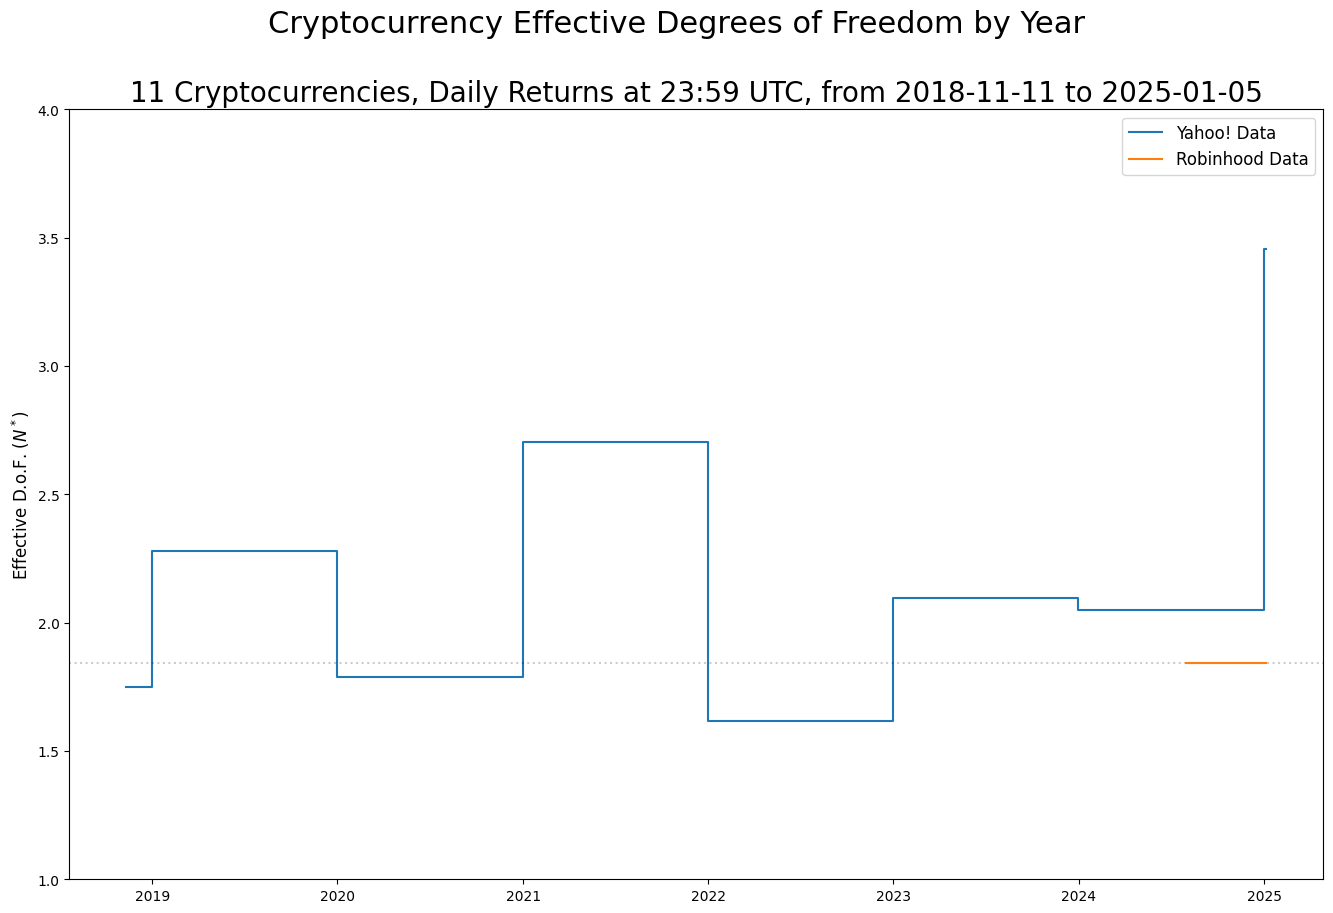

In [15]:
variances=returns[[c for c in returns if '-' in c or c in ('Portfolio','Year')]].groupby('Year').var()
variances["Assets"]=variances.count(axis=1)-1
variances["Independent"]=variances[[c for c in variances if '-' in c]].sum(axis=1)/variances["Assets"]**2
variances[ns:="Effective D.o.F."]=variances["Independent"]/variances["Portfolio"]*variances[na:="Assets"]
variances[nr:="Imputed Correlation"]=(variances[na]-variances[ns])/((variances[na]-one)*variances[ns])*hundred
display(variances)
variances.replace(np.nan,"").T.style.format(precision=2).to_latex(latexfile:=filepath+'variances.tex')
nprint("Wrote variances to '%s.'" % latexfile)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.step(x:=list(map(lambda x:pd.to_datetime(str(x)),[returns.index[0]]+list(map(lambda x:pd.Period(datetime(x,12,31),'D') if x<data.index[-1].year else data.index[-1],variances.index)))),
          y:=np.insert(variances[ns].to_numpy(),0,variances[ns].iloc[0]),'-',where='pre',label='Yahoo! Data') # the code to make x here is heinous, and that is due to Pandas
plot.set_ylabel("Effective D.o.F. ($N^*$)",fontsize=12)
plot.set_ylim(one,four)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.plot(x:=data.index[[0,-1]],y:=[Nstar]*len(x),'-',color='C1',label='Robinhood Data')
plot.legend(fontsize=12)
figure.suptitle(title:="Cryptocurrency Effective Degrees of Freedom by Year",fontsize=22)
plot.set_title(subtitle,fontsize=20)
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')